# Running training in 2019 and 2020: selected countries

> [https://github.com/BMClab/covid19](https://github.com/BMClab/covid19)  
> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab/)  
> Federal University of ABC, Brazil

**The data used in this Jupyter notebook are available on the Figshare repository https://doi.org/10.6084/m9.figshare.16620238.**

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Environment" data-toc-modified-id="Environment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Environment</a></span></li><li><span><a href="#Helping-functions" data-toc-modified-id="Helping-functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Helping functions</a></span></li></ul></li><li><span><a href="#Get-list-of-most-frequent-countries-in-dataset" data-toc-modified-id="Get-list-of-most-frequent-countries-in-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get list of most frequent countries in dataset</a></span><ul class="toc-item"><li><span><a href="#Load-dataset-with-indexes-of-policy-responses-to-the-coronavirus-pandemic-by-country" data-toc-modified-id="Load-dataset-with-indexes-of-policy-responses-to-the-coronavirus-pandemic-by-country-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load dataset with indexes of policy responses to the coronavirus pandemic by country</a></span><ul class="toc-item"><li><span><a href="#Correct-dates" data-toc-modified-id="Correct-dates-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Correct dates</a></span></li></ul></li></ul></li></ul></div>

## Setup

In [1]:
from pathlib import Path
import pickle
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
from tqdm.notebook import tqdm
import pycountry_convert as pc
%load_ext watermark  

### Environment

In [14]:
path2 = Path(r'./../data/')


country = ['Spain', 'sp']
country = ['Switzerland', 'ch']
country = ['Belgium', 'be']
country = ['Ireland', 'ie']
country = ['Denmark', 'dk']
country = ['South Korea', 'kor']
country = ['Portugal', 'pt']
country = ['Ukraine', 'ua']
country = ['India', 'imd']
country = ['Taiwan', 'tw']
country = ['Austria', 'at']
country = ['Singapore', 'sg']
country = ['Poland', 'pl']
country = ['Indonesia', 'id']
country = ['Venezuela', 've']
country = ['Iceland', 'is']
country = ['Peru', 'pe']
country = ['Israel', 'il']
country = ['Philippines', 'ph']
country = ['Costa Rica', 'cr']
country = ['Thailand', 'th']
country = ['Germany', 'gr']
country = ['Australia', 'au']
country = ['Mexico', 'mx']
country = ['Canada', 'ca']
country = ['Chile', 'cl']
country = ['China', 'ch']
country = ['Colombia', 'co']
country = ['Argentina', 'ar']


country = ['France', 'fr']
country = ['Netherlands', 'ne']
country = ['Norway', 'nw']
country = ['Italy', 'it']
country = ['Russia', 'ru']
country = ['Sweden', 'se']
country = ['South Africa', 'sa']
country = ['Malaysia', 'my']


country = ['all countries', 'all']

country = ['United Kingdom', 'uk']
country = ['Japan', 'jp']
country = ['United States', 'us']
country = ['Brazil', 'br']


load_results = True  # load file with results if exists
if not load_results:
    # Warning: the bootstrap process takes hours!
    from bootstrap_stat import bootstrap_stat as bp

tqdm.pandas(desc='Boot', leave=False)
pd.set_option('display.precision', 3)
plt.rcParams.update({'font.size': 14, 'xtick.labelsize': 12,
                     'ytick.labelsize': 12})
sns.set_style('whitegrid', rc={'xtick.bottom': True, 'xtick.top': True,
                               'ytick.left': True,
              'ytick.right': True, 'xtick.direction': 'in',
                               'ytick.direction': 'in'})
Slice = pd.IndexSlice

# Set of colors that is unambiguous both to colorblinds and non-colorblinds
# https://www.cta-observatory.org/wp-content/uploads/2020/10/CTA_ColourBlindness_BestPractices-1.pdf
# https://jfly.uni-koeln.de/color/index.html
#matplotlib.style.use('seaborn-colorblind')
matplotlib.style.use('tableau-colorblind10')
colors = sns.color_palette()
display(colors)

colorbase = 'k'
color2019 = colors[0]
color2020 = colors[1]
colorn = colors[5]
colorvar = colors[4]
colorind = colors[6]


# Statistics
alpha = 0.05
two_tailed = True
# confidence interval
estimate = np.mean
boot = 100000  # number of bootstrap samples
seed = 0

# other variables:
years = ['2019', '2020']
quarters = ['First', 'Second', 'Third', 'Fourth']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
freqs = ['d', 'w', 'm', 'q']
freqs_s = ['day', 'week', 'month', 'quarter']
# feature (dependent variable)
variables, units = ['distance', 'duration'], ['km', 'min']
vars_d = [v + '_d' for v in variables]
# period for analysis
freq, freq_s = freqs[1], freqs_s[1]

%watermark
%watermark --iversions

[(0.0, 0.4196078431372549, 0.6431372549019608),
 (1.0, 0.5019607843137255, 0.054901960784313725),
 (0.6705882352941176, 0.6705882352941176, 0.6705882352941176),
 (0.34901960784313724, 0.34901960784313724, 0.34901960784313724),
 (0.37254901960784315, 0.6196078431372549, 0.8196078431372549),
 (0.7843137254901961, 0.3215686274509804, 0.0),
 (0.5372549019607843, 0.5372549019607843, 0.5372549019607843),
 (0.6352941176470588, 0.7843137254901961, 0.9254901960784314),
 (1.0, 0.7372549019607844, 0.4745098039215686),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529)]

Last updated: 2022-03-12T01:15:00.760152-03:00

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 7.32.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.13.0-30-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

numpy            : 1.22.3
seaborn          : 0.11.2
pandas           : 1.4.1
pycountry_convert: 0.7.2
json             : 2.0.9
matplotlib       : 3.5.1
scipy            : 1.8.0



### Helping functions

In [3]:
# standardization (mean 0, variance 1)
stdz = lambda x: (x-x.mean())/x.std()


def normality(x):
    """Kurtosis, skewness, p-value of normality test using the scipy library.
    """
    return [sp.stats.kurtosis(x), sp.stats.skew(x), sp.stats.normaltest(x).pvalue]


def cohensd(x):
    """Cohen's d effect size for within-subject sample.
    """
    return np.abs(np.mean(x, axis=0)) / np.std(x, axis=0, ddof=1)


def ci_asl(y, stat=np.nanmean, alpha2=0.025, boot=boot):
    """Confidence interval and 'pvalue' of hypothesis testing by bootstrap.

    Parameters
    ----------
    y : 1-d array_like
        Calculate the confidence interval of these values.
    stat : function (optional, default=np.nanmean)
        Statistics (a function) to which the confidence interval will be
        estimated
    alpha : float (optional, default=0.025)
        alpha level (]0, 1[) of the confidence interval
    boot : int (optional, default=100000)
        Number of bootstrap iteractions

    Returns
    -------
    [ci_low, ci_high, asl] : list of floats
        Lower and upper bounds on a 100(1-2*`alpha`)% confidence interval on
        stat of `y`.
        Achieved significance level, the probability of an outcome at least as
        extreme as that actually observed under the null hypothesis; the p-value.


    See Also
    --------
    https://github.com/rwilson4/bootstrap-stat
    """
    ed = bp.EmpiricalDistribution(y)
    ci_low, ci_high, theta_star = bp.percentile_interval(ed, stat, alpha=alpha2, B=boot,
                                                         return_samples=True, num_threads=-1)
    asl = bp.percentile_asl(ed, stat, y, theta_0=0, B=boot,
                            theta_star=theta_star, two_sided=True, num_threads=1)
    
    return [ci_low, ci_high, asl]


def describe(y, variable=['distance_d', 'duration_d'],
             new_variable=None, show=True):
    """Descriptive statistics for dataframe columns.
    """
    ys = []
    stat = ['count', 'mean', 'std', cohensd]
    for var in variable:
        y1 = y[['athlete', var]
              ].pivot(columns='athlete')[var].T.agg(stat, axis=0).transpose()
        y2 = y[['athlete', var]
              ].pivot(columns='athlete')[var].T.progress_apply(ci_asl, alpha2=alpha/2
                                                              ).transpose()
        y2.rename(columns={0: 'ci_inf', 1: 'ci_sup', 2: 'pvalue'}, inplace=True)
        ys.append(pd.concat([y1, y2], axis=1))
    if new_variable is None:
        new_variable = variable
    ys = pd.concat(ys, axis=1, keys=new_variable)
    ys.index = ys.index.dayofyear # range(ys.shape[0])
    # correct index when joining leap year and non leap year
    if ys.shape[0] == 365:  
        ys.index = range(1, 366, 1)
    elif ys.shape[0] == 52:
        ys.index = range(1, 365, 7)
    ys.index.rename('Period', inplace=True)
    if show:
        display(ys)
    return ys


def highlight_cohensd(x):
    '''
    Set background color for cohensd values.
    '''
    #['Nothing', 'Very small', 'Small', 'Medium', 'Large', 'Very large', 'Huge']
    d = [0, .01, .2, .5, .8, 1.2, 2, 100]
    # colors
    cm = sns.color_palette('Greens', n_colors=len(d)-2).as_hex()
    cm = ['background-color: {};font-weight:bold;'.format(c) for c in cm]
    cm.insert(0, 'background-color: '';') 
    x = pd.cut(x, bins=d, right=False, labels=cm, retbins=False)
    return x.to_list()


def highlight_pvalue(x, level=alpha,
                     props='color:white;background-color:red;font-weight:bold'):
    return np.where(x <= level, props, '')


def highlight_max(x,
                  props='color:white;background-color:blue;font-weight:bold'):
    return np.where(x == np.nanmax(x.values), props, '')


def highlight_min(x,
                  props='color:white;background-color:purple;font-weight:bold'):
    return np.where(x == np.nanmin(x.values), props, '')


def display_df(df, subset='mean'):
    """Diplay dataframe with a certain style.
    """
    if type(df.index) == pd.DatetimeIndex:
        df.index = df.index.strftime('%Y-%m-%d')
    display(df.style
            .highlight_max(subset=subset,
                           props='color:white;font-weight:bold;background-color:blue;')
            .highlight_min(subset=subset,
                           props='color:white;font-weight:bold;background-color:purple;'))
    

def display_dfsd(df, title=''):
    """Display dataframe with certain style.
       See https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
    """
    Slice = pd.IndexSlice
    display(df.style.format('{:.0f}', subset=Slice[:, Slice[:, 'count']])
                    .format('{:.4f}', subset=Slice[:, Slice[:, 'pvalue']])
                    .highlight_max(subset=Slice[:, Slice[:, 'mean']],
                                   props='color:white;font-weight:bold;background-color:blue;')
                    .highlight_min(subset=Slice[:, Slice[:, 'mean']],
                                   props='color:white;font-weight:bold;background-color:purple;')
                    .apply(highlight_cohensd, subset=Slice[:, Slice[:, 'cohensd']])
                    .apply(highlight_pvalue, level=alphaS, subset=Slice[:, Slice[:, 'pvalue']])
                    .set_caption(title)
                    .set_table_styles([{'selector': 'caption', 'props': 'font-weight:bold; ' +
                                        'text-align: center; ' +
                                        'caption-side: top; color: #000000; font-size:1.4em;'
                                       }]))

## Get list of most frequent countries in dataset

In [4]:
df = pd.read_parquet(path2 / 'run_ww_2019_d.parquet')
df = df[['athlete', 'gender', 'age_group', 'country', 'major']
       ].drop_duplicates(subset='athlete').sort_values('athlete').reset_index(drop=True)

print('Number of countries: {}'.format(df['country'].unique().size))
print('Number of athletes with unknown country: {} ({:.1f} %)'.format(df['country'].isnull().sum(),
       df['country'].isnull().sum()/df['country'].size*100))

Number of countries: 130
Number of athletes with unknown country: 329 (0.9 %)


In [5]:
cnt_pct = 100*df['country'].value_counts(normalize=True)
cnt_pct = cnt_pct.to_frame().reset_index()
cnt_pct = cnt_pct.rename(columns={'index':'country', 'country':'percentage'})
def get_alpha2(country):
    try:
        alpha2 = pc.country_name_to_country_alpha2(country)
        if alpha2 == 'GB':
            alpha2 = 'UK'
        elif alpha2 == 'DE':
            alpha2 = 'GR'
    except:
        alpha2 = country
    return alpha2.lower()
cnt_pct['country'] = cnt_pct['country'].astype('object')
cnt_pct.insert(1, 'alpha2', cnt_pct['country'].apply(get_alpha2))
cnt_pct = pd.concat([pd.DataFrame(data=[['All countries', 'all', 100]],
                                 columns=['country', 'alpha2', 'percentage']),
                    cnt_pct], ignore_index=True)
cnt_pct.head(11)

,country,alpha2,percentage
0,All countries,all,100.000
1,United States,us,38.101
2,United Kingdom,uk,20.966
3,Germany,gr,5.925
4,Canada,ca,3.170
5,France,fr,2.503
6,Japan,jp,2.375
7,Netherlands,nl,2.300
8,Brazil,br,1.807
9,Australia,au,1.602


### Load dataset with indexes of policy responses to the coronavirus pandemic by country

#### Correct dates

In [6]:
def correct_date(y, freq):
    """
    Correct dates and adjust data of last days to avoid last week with < 7 days
     or of the last day of February if leap year.
    """
    # numerical columns
    cols_num = y.select_dtypes(include='number').columns.to_list()
    ndays_lastweek = 7 + y.index[-1].dayofyear % 7
    if freq == '7d' and ndays_lastweek > 7:
        ts = pd.Timestamp(y.index[-1].date() - pd.to_timedelta(ndays_lastweek-7, unit='D'))
        y.index = y.index.where(y.index <= ts, ts)    
        grouper = pd.Grouper(axis=0, freq=freq)
        y = y.groupby(grouper).mean()
        # correct the divisor if the last week doesn't have 7 days
        y.loc[y.index[-1], cols_num] = y.loc[y.index[-1], cols_num] * (7 / ndays_lastweek)
    elif freq == 'd' and y.index.unique()[59].day == 29:  # leap year
        grouper = pd.Grouper(axis=0, freq=freq)
        y = y.groupby(grouper).mean()
        # February 28 as the average February 28 and 29
        y.loc[y.index[58], cols_num] = y.loc[y.index[58:60], cols_num].mean(axis=0)  
        y = y.drop(index=y.index[59])
    elif freq == 'm' and y.index.unique()[59].day == 29:  # just resample data
        grouper = pd.Grouper(axis=0, freq=freq)
        y = y.groupby(grouper).mean()
    return y

#c19idx = correct_date(c19idx, '7d' if freq == 'w' else freq)

In [7]:
n_cnt = 11
cnt_pct = cnt_pct.head(n_cnt)

# Covid-19 stringency index averaged by percentage of athletes' countries
c19idx_all = pd.read_csv(path2 / 'policy_response_indexes.csv',
                         sep=',', header=0, parse_dates=['date'], verbose=False)
# Covid-19 stringency index of each country
c19idx_cnt = pd.read_csv(path2 / 'policy_response_indexes_countries.csv',
                         sep=',', header=0, parse_dates=['date'], verbose=False)

c19idx_mse = []
dfs_mse = []
for index, row in cnt_pct.iterrows():
    if row['alpha2'] == 'all':
        # Covid-19 stringency index averaged by percentage of athletes' countries
        c19idx = pd.read_csv(path2 / 'policy_response_indexes.csv',
                             sep=',', header=0, parse_dates=['date'], verbose=False)
    else:
        # Covid-19 stringency index by country
        c19idx = c19idx_cnt[c19idx_cnt['country'] == row['country']].drop(columns='country')
    c19idx_mse.append([c19idx['si'].mean(), c19idx['si'].sem()])
    
    fname = path2 / 'dfsdata_{}_{}.pkl'.format('w', row['alpha2'])
    with open(fname, 'rb') as file:
        dfsdata, nruns, c19idx = pickle.loads(file.read())
    dfs_mse.append([dfsdata['distance']['mean'].mean(), dfsdata['distance']['mean'].sem(),
                    dfsdata['distance']['nathletes'].mean(), dfsdata['distance']['nathletes'].sem()])    
        
    
cnt_pct[['c19idx_m', 'c19idx_se']] = np.array(c19idx_mse)
cnt_pct[['distance_m', 'distance_se', 'nathletes_m', 'nathletes_se']] = np.array(dfs_mse)

In [8]:
cnt_pct[['distance_m', 'nathletes_m']] = cnt_pct[['distance_m', 'nathletes_m']].abs()
cnt_pct[['c19idx_m', 'c19idx_se']] = cnt_pct[['c19idx_m', 'c19idx_se']]/10
cnt_pct.set_index('country', inplace=True)
cnt_pct

,alpha2,percentage,c19idx_m,c19idx_se,distance_m,distance_se,nathletes_m,nathletes_se
country,,,,,,,,
All countries,all,100.000,5.433,0.126,7.411,1.859,6.539,0.734
United States,us,38.101,5.616,0.135,6.609,2.028,5.771,0.901
United Kingdom,uk,20.966,5.693,0.137,2.036,2.314,4.925,0.789
Germany,gr,5.925,5.194,0.122,5.246,2.961,3.561,1.288
Canada,ca,3.170,5.444,0.138,6.310,1.974,5.323,0.697
France,fr,2.503,5.490,0.136,15.033,3.126,7.922,1.259
Japan,jp,2.375,3.347,0.065,10.038,1.865,10.515,0.867
Netherlands,nl,2.300,4.916,0.140,4.880,2.826,4.627,1.239
Brazil,br,1.807,5.737,0.143,24.466,2.589,13.748,1.225


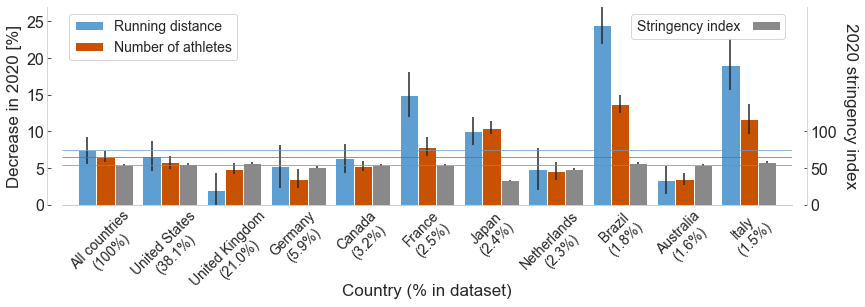

In [15]:
fig, ax = plt.subplots(1, 1, squeeze=True, sharex=True, figsize=(13, 5))
fs = 16
dfm = cnt_pct[['distance_m', 'nathletes_m', 'c19idx_m']]
cnt_pct.plot(y=['distance_m', 'nathletes_m', 'c19idx_m'],
             yerr=cnt_pct[['distance_se', 'nathletes_se', 'c19idx_se']].values.T,
             kind='bar', ax=ax, color=[colorvar, colorn, colorind], width=.85, 
             fontsize=fs)
h, l = ax.get_legend_handles_labels()
ax.legend(['Running distance', 'Number of athletes'], loc='upper left')
ax.hlines(y=cnt_pct.loc['All countries', ['distance_m', 'nathletes_m', 'c19idx_m']],
          xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1],
          colors=[colorvar, colorn, colorind], linestyles='solid', lw=.7)

    
ax.set_ylim([0, 27])
plt.xticks(rotation=45)
ax.spines['left'].set_position(('axes', -.02))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_label_coords(.5, -.4)
ax.grid(False, axis='both')
ax.set_xlabel('Country (% in dataset)', fontsize=fs+1)
ax.set_ylabel('Decrease in 2020 [%]', fontsize=fs+1)
ax.tick_params(axis='both', which='major', labelsize=fs)
xlabel = ['{}\n({}%)'.format(index, np.round(row['percentage'], 1))
          for index, row in cnt_pct.iterrows()]
xlabel[0] = 'All countries\n(100%)'
ax.set_xticklabels(xlabel, fontsize=fs-2)
axr = ax.twinx()
axr.set_ylim([0, 270])
axr.set_yticks([0, 50, 100])
#axr.tick_params(axis='y', colors='brown')
#axr.spines['right'].set_color('brown')
axr.spines['right'].set_position(('axes', 1.02))
axr.yaxis.set_label_coords(1.09, .5)
axr.spines['top'].set_visible(False)
axr.spines['left'].set_visible(False)
axr.legend(h[2], ['Stringency index'], loc='upper right', markerfirst=False)
axr.grid(False, axis='both')
axr.set_ylabel('2020 stringency index', fontsize=fs+1, rotation=-90) #, color='brown'
axr.set_yticklabels([0, 50, 100], fontsize=fs)
plt.subplots_adjust(left=0.1, bottom=0.35, right=0.88, top=0.9)
fig.savefig(path2 / 'figure_averages.png', dpi=200)
plt.show()

Figure 4. Changes in running training and the 2020 stringency index for different countries. Mean and standard error across the year of the decrease in weekly running distance and in the number of athletes running in 2020 compared to 2019 (in %) and of the 2020 stringency index for all countries (36,412 athletes) and for the ten most represented countries in the dataset. The horizontal lines in the graph represent the mean values of the data for all countries. Below each label on the horizontal axis, the percentage value of the number of athletes of each country in the dataset is shown.